In [4]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer, execute
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.quantum_info.operators import Operator

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

{'00000010': 512, '00000101': 512}


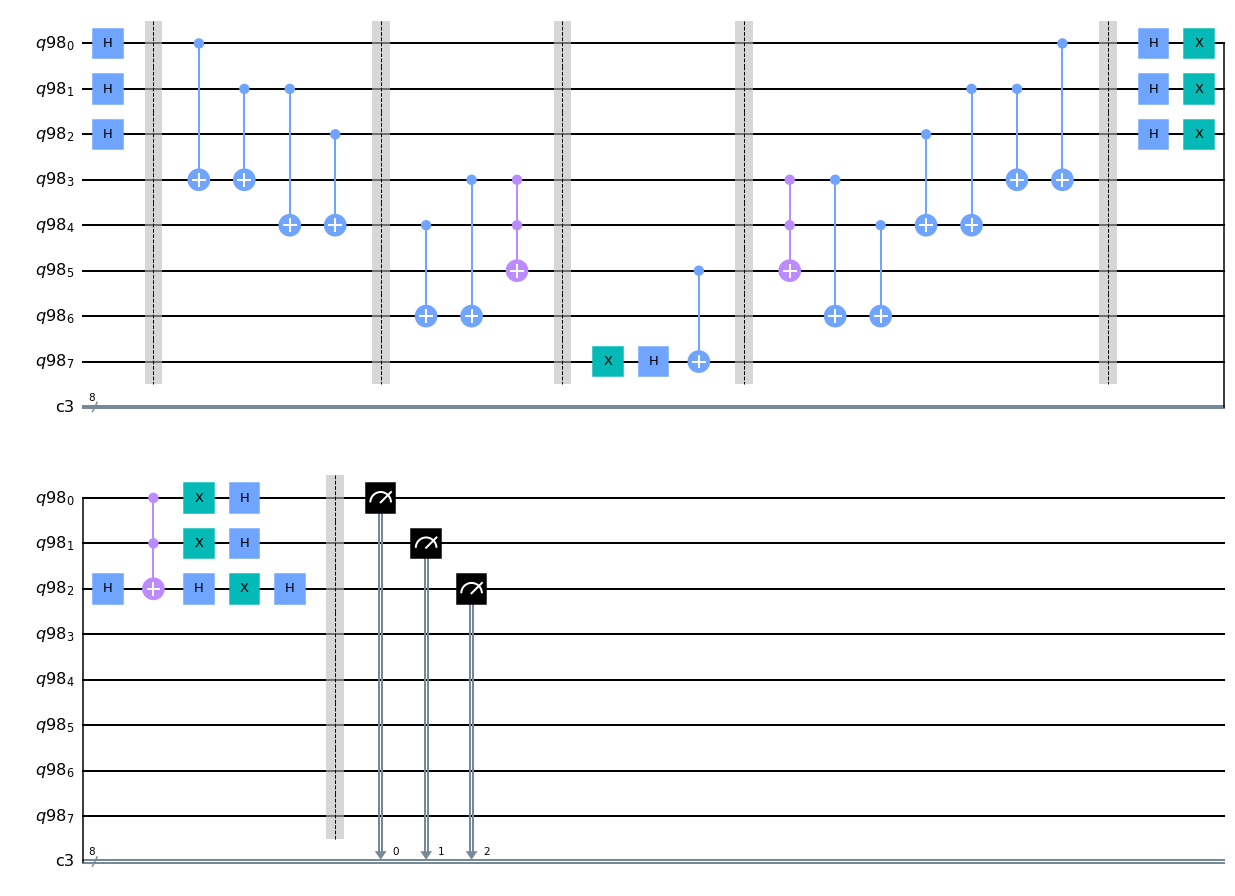

In [7]:
q = QuantumRegister(8)
c = ClassicalRegister(8)
qc = QuantumCircuit(q,c)

#cutedge checker
def ccheck(a, b, c): 
    qc.cx(q[a], q[c]) 
    qc.cx(q[b], q[c])

#half adder
#inputs: a,b 
#outputs: the sum output s and carry output c
def hadder(a,b,s,c):
    #XOR
    qc.cx(q[b], q[s])
    qc.cx(q[a], q[s])
    #AND
    qc.ccx(q[a], q[b], q[c])

#inverse operations
def iccheck(a, b, c): 
    qc.cx(q[b], q[c])
    qc.cx(q[a], q[c]) 
def ihadder(a,b,s,c):
    qc.ccx(q[a], q[b], q[c])
    qc.cx(q[a], q[s])
    qc.cx(q[b], q[s])
    
#diffusion operations
def diffusion(a,b,c):
    qc.h(q[a])
    qc.h(q[b])
    qc.h(q[c])    
    qc.x(q[a])
    qc.x(q[b])
    qc.x(q[c])
    qc.h(q[c])  
    qc.ccx(q[a],q[b], q[c])
    qc.h(q[c])  
    qc.x(q[a])
    qc.x(q[b])
    qc.x(q[c])
    qc.h(q[a])
    qc.h(q[b])
    qc.h(q[c])

#initialization
qc.h(q[0:3])
qc.barrier()

#step 3.1
ccheck(0,1,3)
ccheck(1,2,4)
qc.barrier()

#step 3.2
hadder(3,4,6,5)
qc.barrier()

#step 3.3
qc.x(q[7])
qc.h(q[7])
qc.cx(q[5],q[7])

# uf = Operator([
#    [-1, 0, 0, 0],
#    [0, 1, 0, 0],
#    [0, 0, 1, 0],
#    [0, 0, 0, 1]])
# qc.unitary(uf, [q[5], q[7]], label='Uf')

qc.barrier()

#inverse
ihadder(3,4,6,5)
iccheck(1,2,4)
iccheck(0,1,3)
qc.barrier()

#step 3.4
diffusion(0,1,2)
qc.barrier()

#step 4
qc.measure(q[0:3], c[0:3])

#qc.measure(q[0:7], c[0:7])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

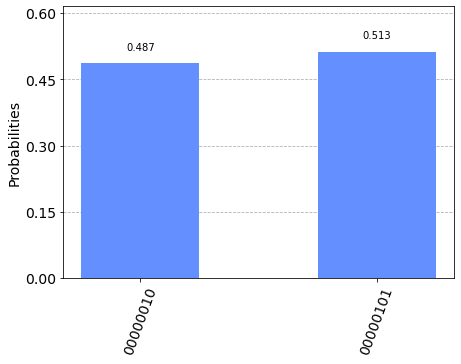

In [3]:
plot_histogram(count)